# Dimensionality Reduction with PCA

In [1]:
%matplotlib inline

# Filter warnings
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

plt.rcParams.update({'font.size': 15})

In [2]:
# Import custom class
%run -i '../src/transfxns.py'

In [3]:
# Instantiate the  classes
transfxn = TransformationPipeline()

# Load data

In [36]:
df = pd.read_csv('../data/kdd99-unsupervised-ad.csv', header = None)
print("Data size:", df.shape) # print data size
df.columns = ['v_{}'.format(i) for i in range(30)] # column names
df.head()

Data size: (620098, 30)


,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29
0,0.0,215.0,45076.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
2,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
3,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
4,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620098 entries, 0 to 620097
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v_0     620098 non-null  float64
 1   v_1     620098 non-null  float64
 2   v_2     620098 non-null  float64
 3   v_3     620098 non-null  float64
 4   v_4     620098 non-null  float64
 5   v_5     620098 non-null  float64
 6   v_6     620098 non-null  float64
 7   v_7     620098 non-null  float64
 8   v_8     620098 non-null  float64
 9   v_9     620098 non-null  float64
 10  v_10    620098 non-null  float64
 11  v_11    620098 non-null  float64
 12  v_12    620098 non-null  float64
 13  v_13    620098 non-null  float64
 14  v_14    620098 non-null  float64
 15  v_15    620098 non-null  float64
 16  v_16    620098 non-null  float64
 17  v_17    620098 non-null  float64
 18  v_18    620098 non-null  float64
 19  v_19    620098 non-null  float64
 20  v_20    620098 non-null  float64
 21  v_21    62

# Categorical variables encoded as integers

In [38]:
# Convert to string
cols = ['v_6', 'v_7', 'v_8', 'v_9']
for i, val in enumerate(cols):
    df[val] = df[val].astype('O')

# Data types

In [39]:
# Recode class label
df.v_29 = df.v_29.map({'n': 'normal', 'o': 'attack'})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620098 entries, 0 to 620097
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v_0     620098 non-null  float64
 1   v_1     620098 non-null  float64
 2   v_2     620098 non-null  float64
 3   v_3     620098 non-null  float64
 4   v_4     620098 non-null  float64
 5   v_5     620098 non-null  float64
 6   v_6     620098 non-null  object 
 7   v_7     620098 non-null  object 
 8   v_8     620098 non-null  object 
 9   v_9     620098 non-null  object 
 10  v_10    620098 non-null  float64
 11  v_11    620098 non-null  float64
 12  v_12    620098 non-null  float64
 13  v_13    620098 non-null  float64
 14  v_14    620098 non-null  float64
 15  v_15    620098 non-null  float64
 16  v_16    620098 non-null  float64
 17  v_17    620098 non-null  float64
 18  v_18    620098 non-null  float64
 19  v_19    620098 non-null  float64
 20  v_20    620098 non-null  float64
 21  v_21    62

# Create feature matrix and class label

In [41]:
X, y = df.drop('v_29', axis = 1), df.v_29

# Transformation pipeline

In [44]:
# Transform and scale data
X_scaled, _, _ = transfxn.preprocessing(X, X)

In [45]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (620098, 33)


# PCA plot

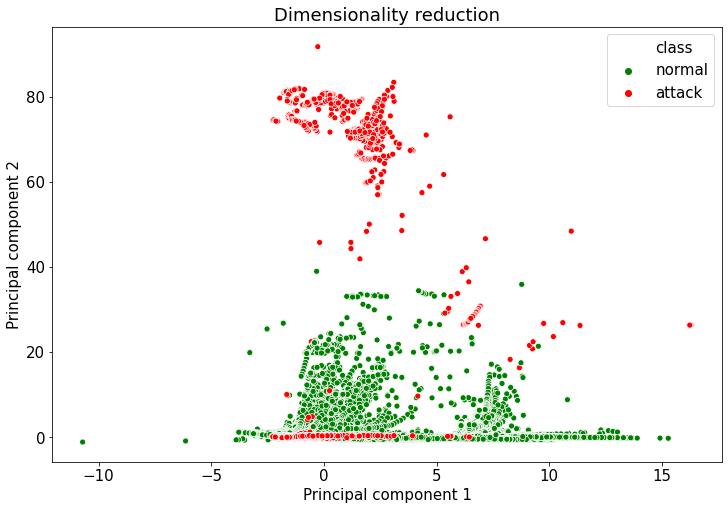

In [46]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])